### 0. Import libraries ### 

In [1]:
import os
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 
import rasterio as rio
# import geospatial_functions.geospatial_analysis as ga
import geospatial_functions.geospatial_plot as gp

print('Done')

Done


### 0. Specify file paths ### 

In [4]:
case = 'shoshone'
# case = 'tuolumne'

# --- common source file paths ---
root_dir = '/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/discretize'
# root_dir = '/Users/hongli/Documents/proj/2020_06_01HRUcomplexity/discretize'

# merit_shp = '/glade/u/home/hongli/data/shapefile/riv_pfaf_7_MERIT_westUS/riv_pfaf_7_MERIT_Hydro_v07_Basins_v01_wUS.shp'
merit_shp = os.path.join(root_dir, 'source_data/riv_pfaf_7_MERIT_westUS/riv_pfaf_7_MERIT_Hydro_v07_Basins_v01_wUS.shp')
merit_shp_prj_dir = os.path.join(root_dir, 'source_data/riv_pfaf_7_MERIT_westUS_prj')
if not os.path.exists(merit_shp_prj_dir):
    os.makedirs(merit_shp_prj_dir)
merit_shp_prj = os.path.join(merit_shp_prj_dir, 'riv_pfaf_7_MERIT_Hydro_v07_Basins_v01_wUS_prj.shp')

# --- case study dependent files --- 
case_dir = os.path.join(root_dir,case)
out_dir = os.path.join(case_dir,'plot')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

dem_crop = os.path.join(case_dir, 'dem_crop.tif')
sub_shp_prj = os.path.join(case_dir, 'subbasin_prj.shp')

stream_clip = os.path.join(root_dir, case, 'stream.shp')
stream_column = 'COMID'

# --- plot configurations ---
wgs_crs = 'epsg:4326'
title = case.capitalize()
                           
print('Done')

Done


### 1. Clip stream shapefile ###

In [ ]:
# ----------------------- Process --------------------------
# re-project merit shapefile to the Albers Equal Area Conic Projection
print('re-project clip streamline')
proj4="+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m no_defs"
dst_crs = rio.crs.CRS.from_string(proj4)
# ga.reproject_vector(merit_shp, merit_shp_prj, dst_crs)     

# clip streamline
print('clip stream')
in_gpd = gpd.read_file(merit_shp_prj)
boundary_gpd = gpd.read_file(sub_shp_prj)
in_gpd_clip = gpd.clip(in_gpd, boundary_gpd)
in_gpd_clip.to_file(stream_clip)

print('Done')

### 2. Plot GRU boundary ###

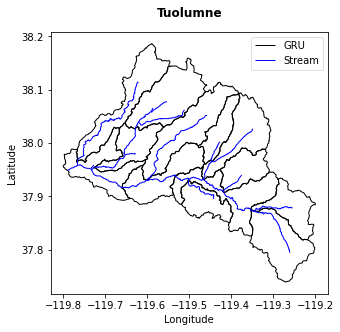

Done


In [5]:
ofile = os.path.join(case_dir, 'plot', 'subbasin_bound.png')   
gp.plot_sub_bound(sub_shp_prj,stream_clip,wgs_crs,title,ofile)

print('Done')

### 3. Plot HRU boundary (background is DEM)###

--- Complexity level 1 ---


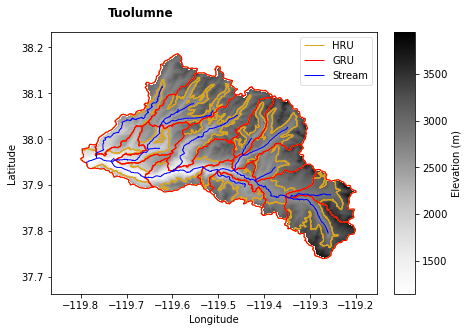

--- Complexity level 2 ---


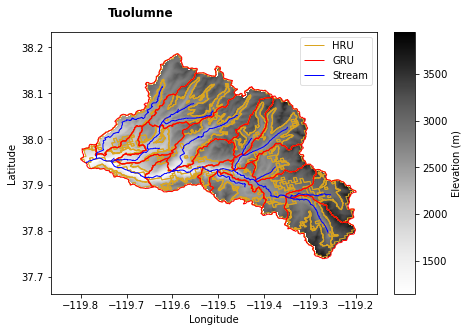

Done


In [9]:
level_num = 2 
for level in range(level_num):
    level = level+1
    print('--- Complexity level %d ---' %(level))

    hru_str = 'hru' + str(level)
    hru_vector = os.path.join(case_dir, hru_str+'.shp')
    ofile = os.path.join(case_dir, 'plot', hru_str+'_bound.png')   

    gp.plot_sub_hru_bound(sub_shp_prj,hru_vector,stream_clip,dem_crop,wgs_crs,title,ofile)

print('Done')

### 4. Plot HRU area ###

--- Complexity level 1 ---


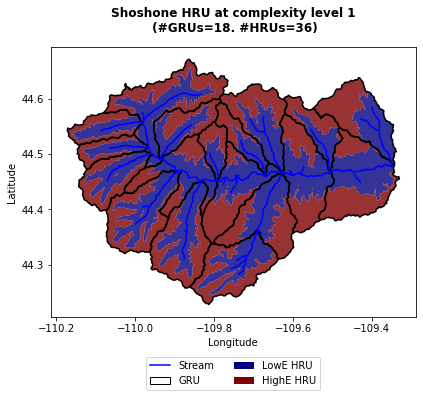

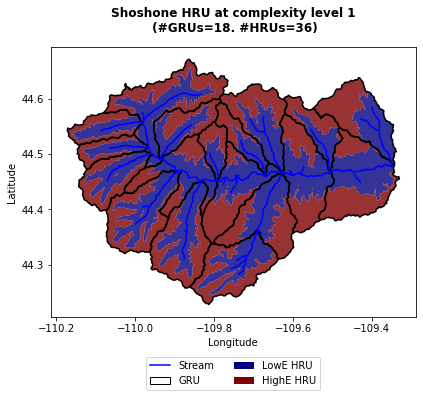

--- Complexity level 2 ---


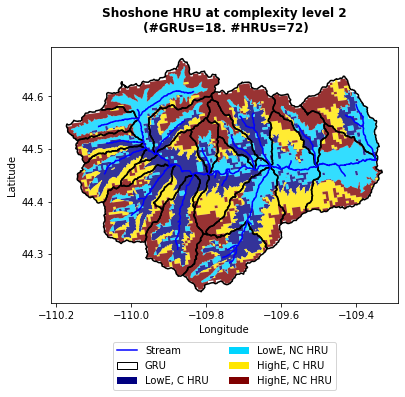

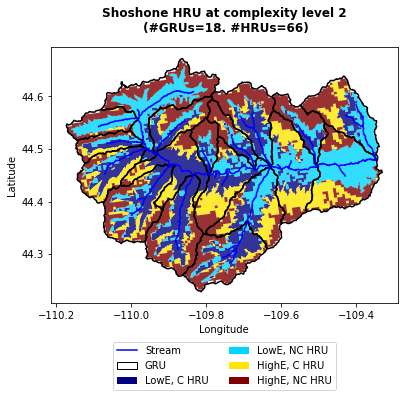

--- Complexity level 3 ---


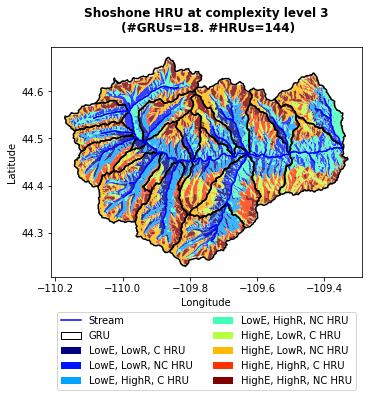

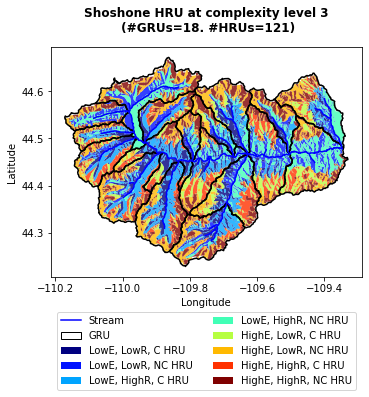

Done


In [5]:
level_num = 3 
for level in range(level_num):
    level = level+1
    print('--- Complexity level %d ---' %(level))

    hru_str = 'hru'+'_lvl' + str(level)
    hru_elmn_str = hru_str+'_elmn'     

    hru_vector = os.path.join(case_dir, hru_str+'.shp')
    hru_vector_elmn = os.path.join(case_dir, hru_elmn_str+'.shp')    
    
    ofile = os.path.join(case_dir, 'plot', hru_str+'.png')   
    ofile_elmn = os.path.join(case_dir, 'plot', hru_elmn_str+'.png')      

    # original HRU
    cmap_str='jet'
    figsize=(9,9*0.6)
    title = case.capitalize()+' HRU'
    leg_ncol=2
    leg_loc='upper center'
    leg_bbox_to_anchor=(0.5,-0.13)
    
    if level == 1:
        gp.plot_hru_level1_area(sub_shp_prj,hru_vector,stream_clip,wgs_crs,cmap_str,
                                figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile)
    elif level == 2: 
        gp.plot_hru_level2_area(sub_shp_prj,hru_vector,stream_clip,wgs_crs,cmap_str,
                                figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile)
    elif level == 3: 
        gp.plot_hru_level3_area(sub_shp_prj,hru_vector,stream_clip,wgs_crs,cmap_str,
                                figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile)
        
    # simplified HRU
    cmap_str='jet'
    figsize=(9,9*0.6)
    title = case.capitalize()+' HRU'
    leg_ncol=2
    leg_loc='upper center'
    leg_bbox_to_anchor=(0.5,-0.13)
    
    if level == 1:
        gp.plot_hru_level1_area(sub_shp_prj,hru_vector_elmn,stream_clip,wgs_crs,cmap_str,
                                figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile_elmn)
    elif level == 2: 
        gp.plot_hru_level2_area(sub_shp_prj,hru_vector_elmn,stream_clip,wgs_crs,cmap_str,
                                figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile_elmn)
    elif level == 3: 
        gp.plot_hru_level3_area(sub_shp_prj,hru_vector_elmn,stream_clip,wgs_crs,cmap_str,
                                figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile_elmn)
        
print('Done')